## 1. k-NN 분류기

In [1]:
from typing import List
from collections import Counter

### 1.1 투표 함수

In [2]:
def majority_vote(labels: List[str]) -> str:
    """Assumes that labels are ordered from nearest to farthest."""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

### 1.2 데이터 포인트

In [12]:
from typing import NamedTuple
from scratch.linear_algebra import Vector, distance

ModuleNotFoundError: No module named 'scratch.linear_algebra'

In [6]:
class LabeledPoint(NamedTuple):
    point: Vector
    label: str

NameError: name 'Vector' is not defined

### 1.3 k-NN 분류기

In [7]:
def knn_classify(k: int,
                 labeled_points: List[LabeledPoint],
                 new_point: Vector) -> str:

    # Order the labeled points from nearest to farthest.
    by_distance = sorted(labeled_points,
                         key=lambda lp: distance(lp.point, new_point))

    # Find the labels for the k closest
    k_nearest_labels = [lp.label for lp in by_distance[:k]]

    # and let them vote.
    return majority_vote(k_nearest_labels)

NameError: name 'LabeledPoint' is not defined

In [8]:
import matplotlib.pyplot as plt
import os
from typing import Dict
import csv
from collections import defaultdict

In [11]:
import os
import pandas as pd
from pandas import DataFrame
import numpy as np

data_path = '/Users/jh.yun/Desktop/target_data'
os.chdir(data_path)
data_list=os.listdir()

vals1 =[]
vals2=[]
vals2_label=[]
vals3= []
vals4=[]
vals5=[]
vals6=[]
inputs=[]

for i in data_list:
    with open(i, "r", encoding='utf8')as f:
        data=f.read()
        data=data.rstrip()
        temp=data.split('-')
        vals1.append(float(temp[0]))
        vals2.append(float(temp[1]))
        vals3.append(float(temp[2]))
        vals4.append(float(temp[3]))
        vals5.append(float(temp[4]))
        vals6.append(float(temp[5]))
        if(float(temp[1])>0.052415):
            vals2_label.append("B")
        elif(float(temp[1]<=0.052415)):
            vals2_label.append("S")
        
        inputs.append(temp)

        
df = DataFrame (inputs,columns=['vals1','vals2','vals3','vals4','vals5','vals6'])
#df=DataFrame(vals2, columns=['vals2'])
df["vals2_label"] = vals2_label
print (df)
data_list = df.values.tolist()

                  vals1               vals2               vals3  \
0     2.894725928057302  0.6708333333333335   2.289689970660691   
1    3.0335995549567043  1.1198130289666666  3.0074748871231725   
2    2.9292997395392546  0.7874333699533319  2.9100574429323496   
3    2.9935663686343608  0.8613616943266625   3.037824637014039   
4    3.0179503600621347  1.2780710856133377  2.9725249219893657   
..                  ...                 ...                 ...   
723  2.8979354714826866  0.9403147379466702  2.9174315569663585   
724   2.922804907569886  1.0359283447399965  2.8967214023993586   
725  2.9513865393907297  0.7536402384199988  2.8939121684932023   
726   2.960022425564191   1.210233561199997   3.048391297172775   
727  2.9358192385845703  1.2522755940666666  2.9414239180277986   

                  vals4               vals5               vals6 vals2_label  
0    0.8498487576465297   2.569539866352771  2.0036292101520243           B  
1    0.6296498145918343   2.67796220967

### 2.2 데이터 파싱 (Q)

In [10]:
def parse_vals2_row(row: List[str]) -> LabeledPoint:
    
    measurements=[float(value) for value in row[:6]]
    
    label=row[-1]
    return LabeledPoint(measurements, label)

NameError: name 'LabeledPoint' is not defined

### 2.3 데이터 읽기

In [ ]:
vals2_data = [parse_vals2_row(row) for row in data_list if row]
print(vals2_data)

#### 데이터 탐색 단계의 시각화를 위해 데이터 행렬 생성

In [ ]:
columns = [
    "vals1", "vals2", "vals3", "vals4", "vals5", 
    "vals6",]

In [14]:
from scratch.linear_algebra import get_column, shape
def make_matrix(dataset):
    matrix = []
    for datapoint in dataset:
        matrix.append(datapoint.point)
    return matrix

ModuleNotFoundError: No module named 'scratch.linear_algebra'

In [15]:

vals2_matrix=data_list
print(shape(vals2_matrix))

NameError: name 'data_list' is not defined

### 2.4 데이터 탐색

#### 2.3.1 클래스 비율 확인

In [13]:
label_type = defaultdict(int)
for data in vals2_data:
    label_type[data.label] += 1

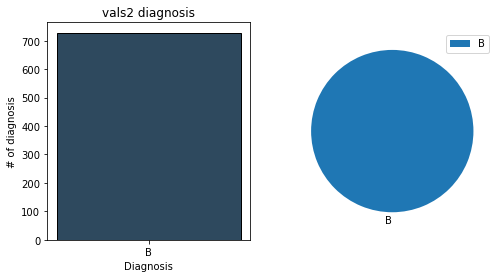

In [14]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.bar(label_type.keys(),
        label_type.values(),
        0.5,
        facecolor="#2E495E",
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.xlabel("Diagnosis")
plt.ylabel("# of diagnosis")
plt.title("vals2 diagnosis")

plt.subplot(1, 2, 2)
pies = plt.pie(label_type.values(),
               labels=label_type.keys(),
               startangle=90)
plt.legend()
plt.show()

### 2.5 데이터셋 분리 (Q)

In [15]:
import random
from scratch.machine_learning import split_data

random.seed(12)
vals2_train, vals2_test=split_data(vals2_data, 0.70)
print(len(vals2_train), len(vals2_test))

509 219


### 2.6 데이터 표준화 (Standardization)

In [16]:

def normalization(dataset):
    data=make_matrix(dataset)
    rescaled = [v[:] for v in data]
    
    return rescaled

In [17]:
vals2_train_matrix = normalization(vals2_train)
vals2_test_matrix = normalization(vals2_test)

### 2.7 예측 (Q) 

In [18]:
from typing import Tuple

def prediction(k : int) -> Tuple[float, Dict[Tuple[str, str], int]]: 
    # your code
    confusion_matrix: Dict[Tuple[str, str], int]=defaultdict(int)
    num_correct=0
    
    for data in vals2_test:
        predicted=knn_classify(k, vals2_train, data.point)
        actual = data.label
        
        if predicted==actual:
            num_correct+=1
        confusion_matrix[(predicted, actual)]+=1
        
    pct_correct = num_correct/len(vals2_test)
    
    return pct_correct, confusion_matrix

### 2.8 엘보 방법 (Elbow method)으로 k 선정 (Q)


Optimal k =  1


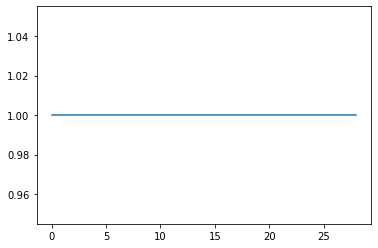

In [19]:
k_candidate = (k for k in range(1, 30))
optimal_k = 0

acc_list : List[float] = []
for k in k_candidate:
    accuracy, confusion_matrix = prediction(k)
    acc_list.append(accuracy)
    # your code
optimal_k=acc_list.index(max(acc_list))+1
print("")
print("Optimal k = ", optimal_k)
plt.plot(acc_list)
plt.show()